## XMAC02 - Prova Bimestral 1
Nome: 

Nro Matric:

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
from scipy.stats import binom, poisson, norm

In [2]:
df = pd.read_csv('breast_cancer_survival_2.csv')
df.head()

,Patient_ID,Age,Marital_Status,Year of Operation,Positive_Axillary_Nodes,Tumor_Size,Radiation_Therapy,Chemotherapy,Hormone_Therapy,Survival_Status
0,eca1411e,36,Married,1959,3,1.7,Yes,Yes,No,2
1,63e3301c,39,Married,1966,0,1.6,Yes,No,No,2
2,01647916,71,Single,1964,3,3.1,No,No,No,2
3,07e33840,50,Married,1960,0,3.0,Yes,No,Yes,1
4,ed75da3f,44,Married,1965,4,2.6,Yes,No,No,1


Significado dos atributos:
- Age: Idade da paciente
- Year of operation: Ano que realizou a cirurgia
- Positive_Axillary_Nodes: Nódulos axilares positivos - nódulos nas axilas contendo células canceríginas
- Tumor_Size: tamanho do tumor, em polegadas
- Radiation_Therapy: radioterapia
- Chemotherapy: Quimioterapia
- Hormone_Therapy: Terapia hormonal
- Survival_Status: Status de sobrevivência - 1=sobreviveu, 2=não sobreviveu

### Questão 1 [valor: 1,0]
Considerando apenas as mulheres casadas que realizaram a cirurgia após o ano de 1962, informe:
- O tamanho médio do tumor
- O desvio padrão do tamanho do tumor
- O maior tumor encontrado

In [14]:
filtroMarried = df[df['Marital_Status'] == 'Married']  
dfQ1 = filtroMarried[filtroMarried['Year of Operation'] > 1962]
dfQ1

print('Tamanho médio do Tumor')
print(np.mean(dfQ1['Tumor_Size']))

print('Desvio padrão do tamanho do tumor')
print(st.stdev(dfQ1['Tumor_Size']))

print('Maior tumor encontrado')
print(np.max(dfQ1['Tumor_Size']))

Tamanho médio do Tumor
2.7382316313823165
Desvio padrão do tamanho do tumor
1.298731535822686
Maior tumor encontrado
5.0


### Questão 2 [valor: 1,0]
Plote um boxplot comparando o tamanho do tumor de sobreviventes e não-sobreviventes.

<Axes: title={'center': 'Tumor_Size'}, xlabel='Survival_Status'>

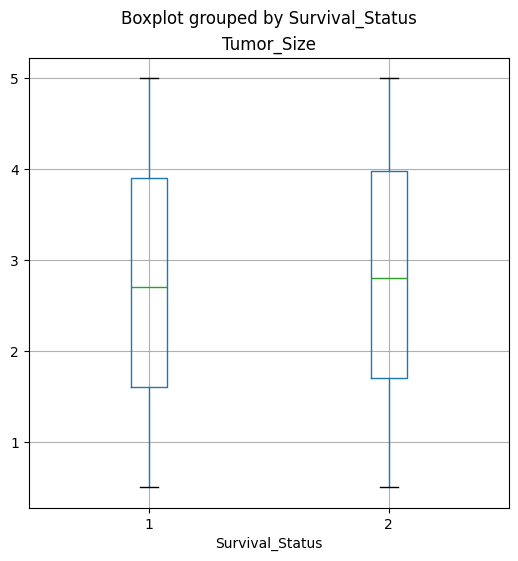

In [18]:
plt.rcParams["figure.figsize"] = [6,6]
df.boxplot(by ='Survival_Status', column =['Tumor_Size'])

### Questão 3 [valor: 1,0]
Plote um gráfico de barras que mostre o 'Survival_Status' de pacientes que fizeram e não fizeram Quimioterapia (Chemotherapy).

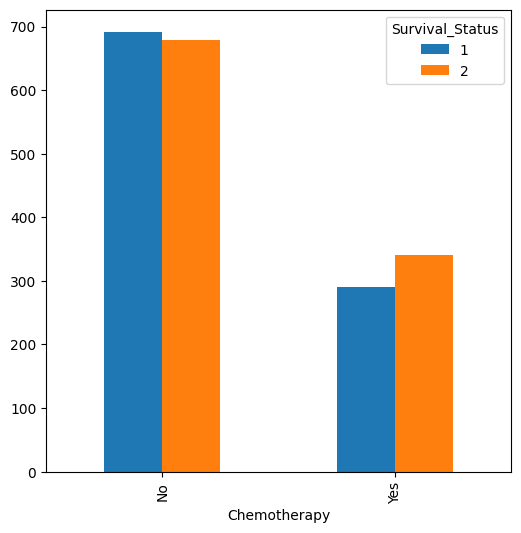

In [22]:
plt.rcParams['figure.figsize'] = [6, 6]
summary = pd.crosstab(df['Chemotherapy'], df['Survival_Status'])
summary.plot(kind='bar', stacked=False)
plt.show()

### Questão 4 [valor: 1,5]
Plote 3 gráficos de pizza lado a lado mostrando a porcentagem de pacientes que fizeram:
- Quimioterapia (Chemotherapy)
- Radioterapia (Radiation_Therapy)
- Terapia hormonal (Hormone_Therapy)


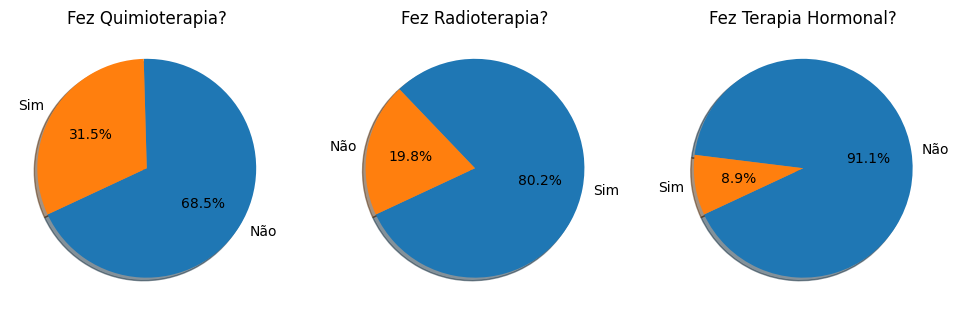

In [111]:
plt.rcParams['figure.figsize'] = [12, 8]

quimioterapia = df['Chemotherapy'].value_counts(normalize=True)
radioterapia = df['Radiation_Therapy'].value_counts(normalize=True)
terapiaHormonal = df['Hormone_Therapy'].value_counts(normalize=True)

plt.subplot(1,3,1)
plt.pie(quimioterapia, labels=["Não", "Sim"], autopct='%1.1f%%', shadow=True, startangle=205)
plt.title("Fez Quimioterapia?")
plt.subplot(1,3,2)
plt.pie(radioterapia, labels=["Sim", "Não"], autopct='%1.1f%%', shadow=True, startangle=205)
plt.title("Fez Radioterapia?")
plt.subplot(1,3,3)
plt.pie(terapiaHormonal, labels=["Não", "Sim"], autopct='%1.1f%%', shadow=True, startangle=205)
plt.title("Fez Terapia Hormonal?")
# plt.tight_layout()
plt.show()

### Questão 5 [valor: 1,5]
Plote um gráfico de barras que exiba a quantidade de pacientes que fizeram quimioterapia, radioterapia e terapia hormonal. Para cada terapia, exiba a quantidade de sobreviventes e não sobreviventes.

<Axes: xlabel='Hormone_Therapy'>

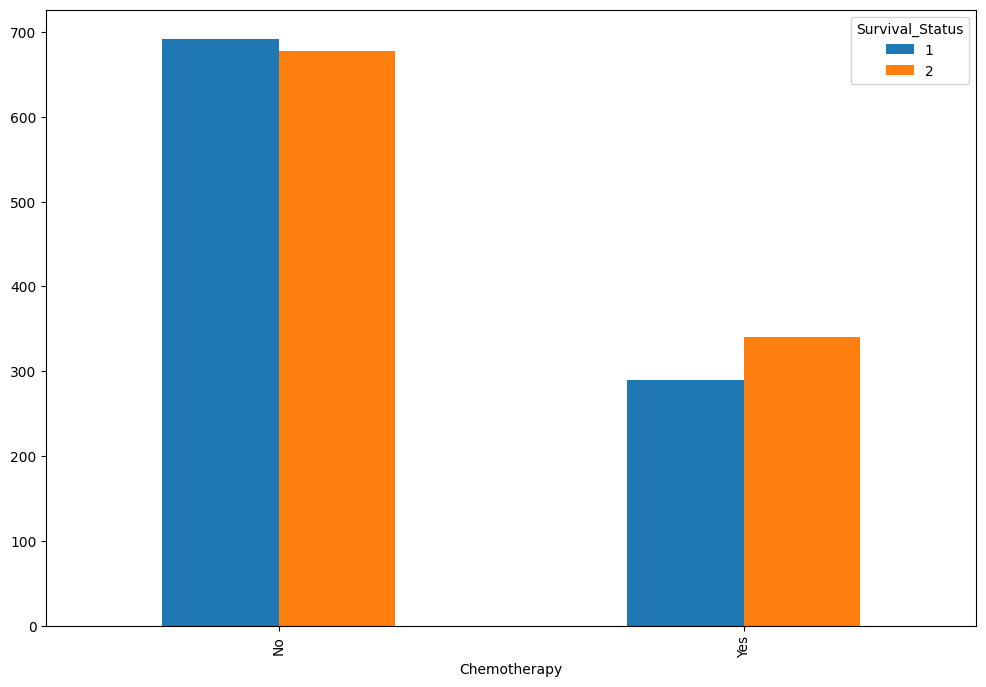

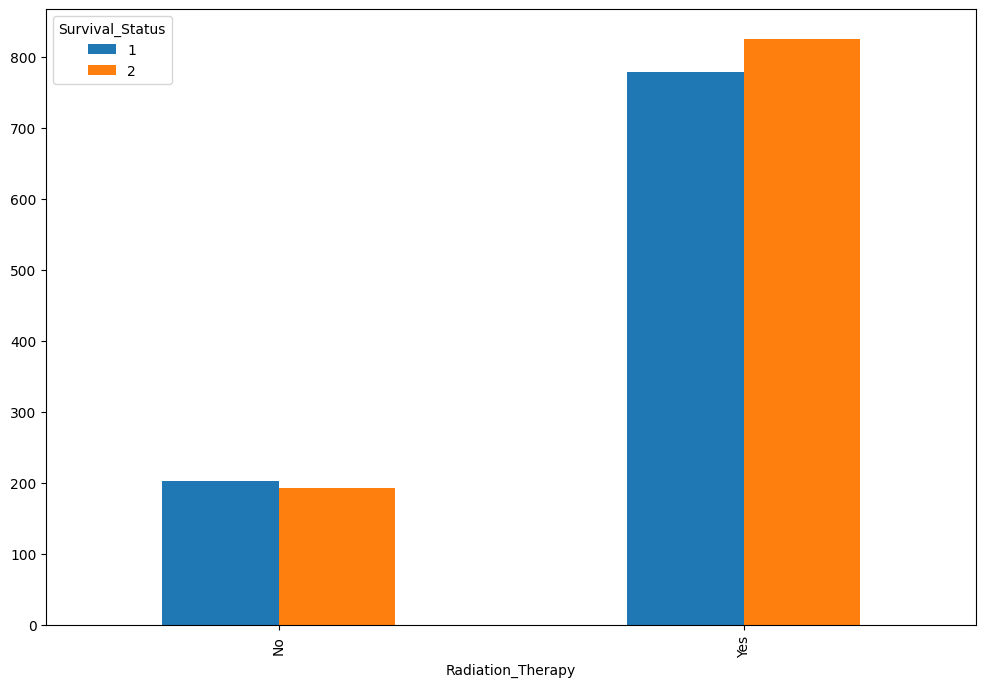

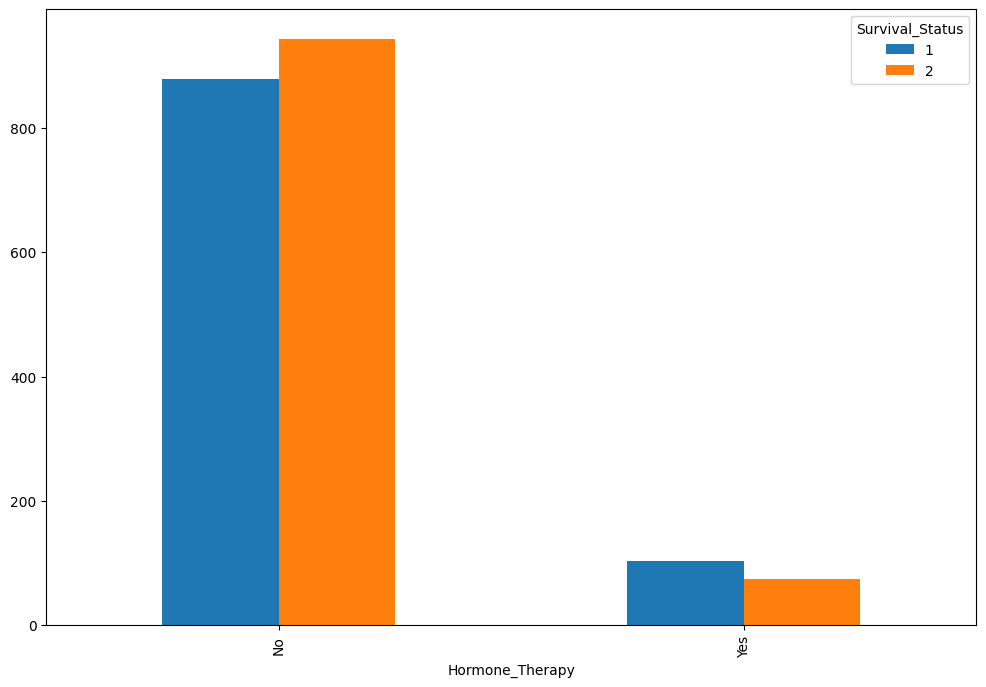

In [163]:
plt.rcParams['figure.figsize'] = [12, 8]

dfQ5 = pd.crosstab(df['Chemotherapy'], df['Survival_Status'])
dfQ5.plot(kind='bar', stacked=False)

dfQ6 = pd.crosstab(df['Radiation_Therapy'], df['Survival_Status'])
dfQ6.plot(kind='bar', stacked=False)

dfQ7 = pd.crosstab(df['Hormone_Therapy'], df['Survival_Status'])
dfQ7.plot(kind='bar', stacked=False)

### Questão 6 [valor: 1,0]
Um banco oferece aos seus clientes um empréstimo para aquisição de veículo e um empréstimo para aquisição habitacional. Um estudo mostra que a probabilidade de um cliente adquirir um empréstimo para aquisição de veículo é de 0,35, a probabilidade de um cliente adquirir um empréstimo habitacional é de 0,46 e a probabilidade de um cliente adquirir pelo menos um dos empréstimos é de 0,59. Encontre a probabilidade de um cliente adquirir ambos os empréstimos, o de veículo e o habitacional.

In [122]:
poisson.pmf(1, 0.35+0.46) + poisson.pmf(1, 0.59)

0.6873881316339414

### Questão 7 [valor: 1,0]
A equipe para atendimento de chamadas em uma empresa é baseada na previsão de 180 chamadas telefônicas por hora, distribuídas aleatoriamente. Se houver 20 chamadas ou mais em um período de 5 minutos, a capacidade é excedida e haverá um tempo de espera indesejado, portanto, há uma capacidade de 19 chamadas a cada 5 minutos. \
a) Qual é a probabilidade de a capacidade ser excedida em um período aleatório de 5 minutos? \
b) Qual deve ser a capacidade mínima para que se garanta uma probabilidade de 99% de que todas as chamadas sejam atendidas sem tempo de espera por um período selecionado aleatoriamente de 5 minutos?


In [172]:
print('a)', poisson.cdf(20, 3.6))

print('b)', norm.ppf(0.99, 180, 5))

a) 0.9999999996927758
b) 191.6317393702042


### Questão 8 [valor: 1,0]
O escore em um teste internacional de proficiência na língua inglesa varia de 0 a 700 pontos, com mais pontos indicando um melhor desempenho. Informações, coletadas durante vários anos, permitem estabelecer o seguinte modelo para o desempenho no teste: \
Pontos: [0,200) [200,300) [300,400) [400,500) [500,600) [600,700) \
Pi:______0.06_____0.15_____0.16_____0.25_____0.28______0.10 \
Várias universidades americanas exigem um escore mínimo de 600 pontos para aceitar candidatos de países de língua não inglesa. De um grande grupo de estudantes brasileiros que prestaram o último exame escolhemos ao acaso 20 deles. Qual a probabilidade de no máximo 3 atenderem ao requisito mínimo mencionado? 

In [97]:
binom.cdf(3, 20, 0.10)

0.8670466765656649

### Questão 9 [valor: 1,0]
100 alunos de uma classe realizaram uma prova e a média da turma foi 5,8 com desvio padrão 2,5. Assumindo que as notas da turma seguem uma distribuição Normal de probabilidade, responda as questões a seguir. \
a) Quantos alunos tiraram menos que 6,0? \
b) Quantos alunos tiraram entre 6,0 e 8,0? \
c) Quantos alunos tiraram mais que 9,0?

In [76]:
probA = norm.cdf(6, 5.8, 2.5) - norm.pdf(6, 5.8, 2.5)
print('a)', probA * 100)

probB = norm.sf(6, 5.8, 2.5) - norm.sf(8, 5.8, 2.5)
print('b)', probB * 100)

probC = norm.sf(9, 5.8, 2.5)
print('c)', probC * 100)

a) 37.281428980934386
b) 27.868897320930046
c) 10.027256795444206
